In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#import data
df = pd.DataFrame(pd.read_csv(r'C:\Users\ibrah\OneDrive\Desktop\Intro to ML\HW1\Housing.csv'))
df.head(); # To get first n rows from the dataset default value of n is 5
m = len(df)

In [3]:
#pre-process data - yes & no to binary
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#define map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

#Apply fucntion
df[varlist] = df[varlist].apply(binary_map)

In [4]:
#Split Data set into Training Data and Test Data.
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df, train_size=0.8, test_size=0.2)
mT = len(df_train)
mV = len(df_test)

In [5]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom', 'basement'
            , 'hotwaterheating', 'airconditioning', 'prefarea']
#create new sets
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]

In [6]:
#set and apply sacler
Scaler = MinMaxScaler()
#Scaler = StandardScaler()
df_Newtrain[num_vars] = Scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = Scaler.fit_transform(df_Newtest[num_vars])

In [7]:
#isolate y and x
y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()

y_Normtest = df_Newtest.pop('price')
X_Normtest = df_Newtest.copy()

# Problem 2a

In [8]:
# set input variables into X for 2a - train set
#X1:area, X2:bedrooms, X3:bathrooms, X4:stories, X5:parking
X1Ta = df_Newtrain.values[:,0]
X2Ta = df_Newtrain.values[:, 1]
X3Ta = df_Newtrain.values[:, 2]
X4Ta = df_Newtrain.values[:, 3]
X5Ta = df_Newtrain.values[:, 4]
# set first column (price) to output Y
yTa = y_Normtrain.values

# set input variables into X for 2a - validation set
#X1:area, X2:bedrooms, X3:bathrooms, X4:stories, X5:parking
X1Va = df_Newtest.values[:, 0]
X2Va = df_Newtest.values[:, 1]
X3Va = df_Newtest.values[:, 2]
X4Va = df_Newtest.values[:, 3]
X5Va = df_Newtest.values[:, 4]
# set first column (price) to output Y
yVa = y_Normtest.values

In [9]:
#Create xTrain array for 2a - training
X_0Ta = np.ones((mT, 1))
X_1Ta = X1Ta.reshape(mT, 1)
X_2Ta = X2Ta.reshape(mT, 1)
X_3Ta = X3Ta.reshape(mT, 1)
X_4Ta = X4Ta.reshape(mT, 1)
X_5Ta = X5Ta.reshape(mT, 1)
xTa = np.hstack((X_0Ta, X_1Ta, X_2Ta, X_3Ta, X_4Ta, X_5Ta))

#Create xTest array for 2a - validate
X_0Va = np.ones((mV, 1))
X_1Va = X1Va.reshape(mV, 1)
X_2Va = X2Va.reshape(mV, 1)
X_3Va = X3Va.reshape(mV, 1)
X_4Va = X4Va.reshape(mV, 1)
X_5Va = X5Va.reshape(mV, 1)
xVa = np.hstack((X_0Va, X_1Va, X_2Va, X_3Va, X_4Va, X_5Va))

In [10]:
""" 
      Function to compute loss

      Input Parameters: 
      ---------------- 
      X : mxn array (m = number of training examples; n= number of features).
      y : 1xm array with answer value to the training examples.
      theta : 1xn array of fitting weights.

      Output Parameters 
      ----------------- 
      J : the loss - scalar value. 
""" 
def compute_loss(X, y, theta): 

    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J 

In [11]:
""" 
  Function to  loss for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : mxn array (m = number of training examples; n= number of features).
  y : 1xm array with answer value to the training examples.
  theta : 1xn array of fitting weights.
  alpha : Learning rate - Scalar value. 
  iterations: No of iterations - Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : 1xn array of final fitting weights
  loss_history: m x 1 array of loss values of each iteration
  """ 
def gradient_descent(xT, yT, xV, yV, theta, alpha, iterations): 
    loss_history_train = np.zeros(iterations)
    loss_history_validate = np.zeros(iterations) 
 
    for i in range(iterations): 
        predictions = xT.dot(theta) 
        errors = np.subtract(predictions, yT) 
        sum_delta = (alpha / mT) * xT.transpose().dot(errors); 
        theta = theta - sum_delta; 
        loss_history_train[i] = compute_loss(xT, yT, theta)
        loss_history_validate[i] = compute_loss(xV, yV, theta) 
        
    return theta, loss_history_train, loss_history_validate 

In [12]:
#declare parameters with initial values
theta_2a = [0., 0., 0., 0., 0., 0.] 
iterations = 700; 
alpha = 0.01

In [13]:
theta, loss_history_train_a, loss_history_validate_a = gradient_descent(xTa, yTa, xVa, yVa, theta_2a, alpha, iterations) 
theta

array([0.14297711, 0.09929129, 0.08937593, 0.10553912, 0.10628643,
       0.0978262 ])

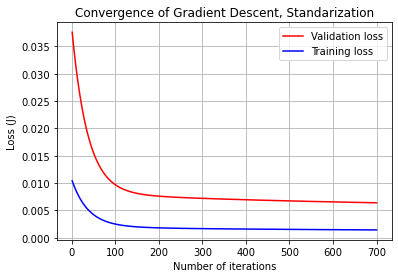

In [14]:
#plot for 2a
plt.plot(range(1, iterations + 1),loss_history_train_a, color='red', label='Validation loss')
plt.plot(range(1, iterations + 1),loss_history_validate_a, color='blue', label='Training loss') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent, Standarization') 
plt.legend()

# Problem 2b

In [15]:
# set input variables into X for 2a - train set
#X1:area, X2:bedrooms, X3:bathrooms, X4:stories, X5:mainroad, X6:guestroom,
#X7:basement, X8:hotwaterheating, X9:airconditioning, X10:parking, X11:prefarea
X1Tb = df_Newtrain.values[:,0]
X2Tb = df_Newtrain.values[:, 1]
X3Tb = df_Newtrain.values[:, 2]
X4Tb = df_Newtrain.values[:, 3]
X5Tb = df_Newtrain.values[:, 4]
X6Tb = df_Newtrain.values[:, 5]
X7Tb = df_Newtrain.values[:, 6]
X8Tb = df_Newtrain.values[:, 7]
X9Tb = df_Newtrain.values[:, 8]
X10Tb = df_Newtrain.values[:, 9]
X11Tb = df_Newtrain.values[:, 10]
# set first column (price) to output Y
yTb = y_Normtrain.values

# set input variables into X for 2a - validation set
#X1:area, X2:bedrooms, X3:bathrooms, X4:stories, X5:mainroad, X6:guestroom,
#X7:basement, X8:hotwaterheating, X9:airconditioning, X10:parking, X11:prefarea
X1Vb = df_Newtest.values[:, 0]
X2Vb = df_Newtest.values[:, 1]
X3Vb = df_Newtest.values[:, 2]
X4Vb = df_Newtest.values[:, 3]
X5Vb = df_Newtest.values[:, 4]
X6Vb = df_Newtest.values[:, 5]
X7Vb = df_Newtest.values[:, 6]
X8Vb = df_Newtest.values[:, 7]
X9Vb = df_Newtest.values[:, 8]
X10Vb = df_Newtest.values[:, 9]
X11Vb = df_Newtest.values[:, 10]
# set first column (price) to output Y
yVb = y_Normtest.values

In [16]:
#Create xTrain array for 1a - training
X_0Tb = np.ones((mT, 1))
X_1Tb = X1Tb.reshape(mT, 1)
X_2Tb = X2Tb.reshape(mT, 1)
X_3Tb = X3Tb.reshape(mT, 1)
X_4Tb = X4Tb.reshape(mT, 1)
X_5Tb = X5Tb.reshape(mT, 1)
X_6Tb = X6Tb.reshape(mT, 1)
X_7Tb = X7Tb.reshape(mT, 1)
X_8Tb = X8Tb.reshape(mT, 1)
X_9Tb = X9Tb.reshape(mT, 1)
X_10Tb = X10Tb.reshape(mT, 1)
X_11Tb = X11Tb.reshape(mT, 1)
xTb = np.hstack((X_0Tb, X_1Tb, X_2Tb, X_3Tb, X_4Tb, X_5Tb, X_6Tb, X_7Tb, X_8Tb, X_9Tb, X_10Tb, X_11Tb))

#Create xTest array for 1a - validate
X_0Vb = np.ones((mV, 1))
X_1Vb = X1Vb.reshape(mV, 1)
X_2Vb = X2Vb.reshape(mV, 1)
X_3Vb = X3Vb.reshape(mV, 1)
X_4Vb = X4Vb.reshape(mV, 1)
X_5Vb = X5Vb.reshape(mV, 1)
X_6Vb = X6Vb.reshape(mV, 1)
X_7Vb = X7Vb.reshape(mV, 1)
X_8Vb = X8Vb.reshape(mV, 1)
X_9Vb = X9Vb.reshape(mV, 1)
X_10Vb = X10Vb.reshape(mV, 1)
X_11Vb = X11Vb.reshape(mV, 1)
xVb = np.hstack((X_0Vb, X_1Vb, X_2Vb, X_3Vb, X_4Vb, X_5Vb, X_6Vb, X_7Vb, X_8Vb, X_9Vb, X_10Vb, X_11Vb))

In [17]:
""" 
      Function to compute loss

      Input Parameters: 
      ---------------- 
      X : mxn array (m = number of training examples; n= number of features).
      y : 1xm array with answer value to the training examples.
      theta : 1xn array of fitting weights.

      Output Parameters 
      ----------------- 
      J : the loss - scalar value. 
""" 
def compute_loss(X, y, theta): 

    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) 
    return J 

In [18]:
""" 
  Function to  loss for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : mxn array (m = number of training examples; n= number of features).
  y : 1xm array with answer value to the training examples.
  theta : 1xn array of fitting weights.
  alpha : Learning rate - Scalar value. 
  iterations: No of iterations - Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : 1xn array of final fitting weights
  loss_history: m x 1 array of loss values of each iteration
  """ 
def gradient_descent(xT, yT, xV, yV, theta, alpha, iterations): 
    loss_history_train = np.zeros(iterations)
    loss_history_validate = np.zeros(iterations) 
 
    for i in range(iterations): 
        predictions = xT.dot(theta) 
        errors = np.subtract(predictions, yT) 
        sum_delta = (alpha / mT) * xT.transpose().dot(errors); 
        theta = theta - sum_delta; 
        loss_history_train[i] = compute_loss(xT, yT, theta)
        loss_history_validate[i] = compute_loss(xV, yV, theta) 
        
    return theta, loss_history_train, loss_history_validate 

In [19]:
#declare parameters with initial values
theta_2b = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.] 
iterations = 700; 
alpha = 0.01

In [20]:
theta, loss_history_train_b, loss_history_validate_b = gradient_descent(xTb, yTb, xVb, yVb, theta_2b, alpha, iterations)
theta

array([0.05999231, 0.06379677, 0.05452301, 0.08660052, 0.0793291 ,
       0.06649384, 0.06457234, 0.04281009, 0.03285163, 0.02951136,
       0.08835441, 0.06789459])

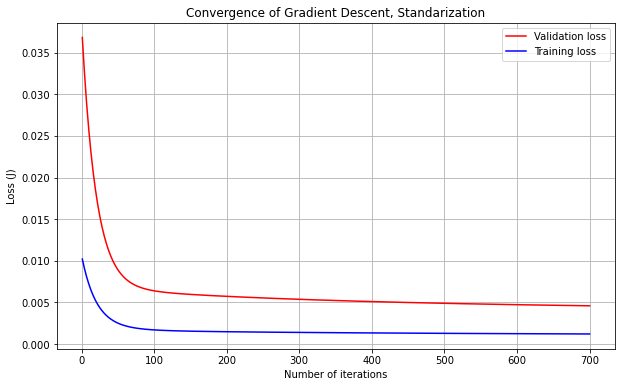

In [21]:
#plot for 2b
plt.plot(range(1, iterations + 1),loss_history_train_b , color='red', label='Validation loss')
plt.plot(range(1, iterations + 1),loss_history_validate_b, color='blue', label='Training loss') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent, Standarization') 
plt.legend()